**Transjakarta**

# Latar Belakang
Transjakarta sebagai salah moda transportasi pilihan mobilitas penduduk di DKI Jakarta. Perkembangan teknologi dan persaingan yang semakin ketat dalam industri transportasi, Transjakarta menyadari pentingnya penggunaan data untuk meningkatkan layanan dan pendapatan mereka. Aspek yang perlu diperhatikan adalah operasional dan pemasaran Transjakarta guna memanfaatkan data secara efektif guna mengoptimalkan stategi operasional dan pemasaran.
Mencapai tujuan tersebut, Manajemen Transjakarta memutuskan merekrut *data scientist* yang bertanggung jawab untuk menganalisa data terkait penggunakan layanan Tranjakarta. Dengan keilmuan dan pemahaman data Scientist tentang transportasi dan perilaku pengguna, Transjakarta dapat meningkatkan layanan operasional dan pendapatan.

# StakeHolder

1. Operations Team
2. Marketing Team

# Pernyataan Masalah
Berdasarkan latar belakang di atas, Transjakarta ingin mengetahui hal apa saja yang bisa menjadi pola karakteristik dari data layanan Transjakarta
1. Pengguna Tranjakarta berdasarkan demografi (gender dan usia)
2. Pengguna Tranjakarta pada hari kerja dan hari akhir pekan
3. Pengguna Tranjakarta berdasarkan koridor dan/ halte
4. Pembayaran layanan berdasarkan PayCard dan pendapatan dari PayCard

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan:
1. Bagaimana cara mengoptimalkan pengelolaan armada dan jadwal operasional Transjakarta untuk memastikan ketersediaan bus yang memadai pada jam-jam sibuk dan meningkatkan kepuasan pengguna?
2. Bagaimana cara optimalisasi pendapatan dapat diterapkan pada halte-halte teramai untuk mendukung operasional dan pengembangan Transjakarta?


# Data

Menjawab pernyataan masalah, dilakukan pemahaman dataset sebagai berikut

In [199]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import kstest

import warnings
warnings.filterwarnings("ignore")

Dataset yang digunakan adalah data pengguna Transjakarta pada Bulan April 2023 

In [200]:
# Load data

df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


*Data Set Overview*
Data set berisi 22 kolom yang menjelaskan informasi:

* transID : ID transaksi unik untuk setiap transaksi
* payCardID : Identifikasi utama pelanggan. Kartu yang pelanggan gunakan sebagai tiket masuk dan keluar.
* payCardBank : Nama bank penerbit kartu pelanggan
* payCardName : Nama pelanggan yang tercetak di kartu.
* payCardSex : Jenis kelamin pelanggan yang tercetak di kartu
* payCardBirthDate : Tahun kelahiran pelanggan
* corridorID : ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
* corridorName : Nama Koridor / Nama Rute yang berisi Titik Awal dan Titik Akhir untuk setiap rute.
* direction : 0 untuk Pergi, 1 untuk Kembali. Arah rute.
* tapInStops : ID Halte Tap In (masuk) untuk mengidentifikasi nama halte
* tapInStopsName : Nama Halte Tap In (masuk) di mana pelanggan melakukan tap in.
* tapInStopsLat : Garis lintang (Latitude) Halte Tap In
* tapInStopsLon : Garis bujur (Longitude) Halte Tap In
* stopStartSeq : Urutan dari halte, halte pertama, halte kedua, dan seterusnya. 
* tapInTime : Waktu tap in. Tanggal dan waktu
* tapOutStops : ID Halte Tap Out (keluar) untuk mengidentifikasi nama halte
* tapOutStopsName : Nama Halte Tap Out (keluar) di mana pelanggan melakukan tap out.
* tapOutStopsLat : Garis lintang (Latitude) Halte Tap Out
* tapOutStopsLon : Garis bujur (Longitude) Halte Tap Out
* stopEndSeq : Urutan dari halte, halte pertama, halte kedua, dan seterusnya. 
* tapOutTime : Waktu tap out. Tanggal dan waktu
* payAmount : Jumlah yang dibayarkan oleh pelanggan. Ada yang gratis. Ada yang tidak.

# Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


# Informasi Umum dari Dataset TransJakarta

In [201]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [202]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [203]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

,Nama Kolom,Jumlah Unique Value,Unique Values
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


Dari hasil Data Understanding diatas, sejauh ini dapat kita simpulkan bahwa :

- Dataset Transjakarta memiliki 22 kolom dan 37.900 baris (Belum Data Cleaning) 
- Periode waktu dataset satu bulan yaitu dimulai dari 1 April 2023 sampai dengan 30 April 
- Terdapat 6 jenis yang digunakan untuk melakukan pembayaran dan yang banyak digunakan adalah dki
- Terdapat 2 gender laki-laki dan perempuan
- Rata-rata usia pengguna transjakarta di tahun kelahiran 1990 yang berarti berusia 33 tahun, sedankan pengguna tertua dikelahiran 1946 dan yang paling muda di kelahiran 2012
- Kolom tapInTime dan tapOutTime berisikan waktu dari tap masuk dan tap keluar halte memiliki tipe data object seharusnya merupakan data datetime
- Corridor yang paling banyak digunakan adalah 1T (Cibubur - Balai Kota)
- Untuk halte yang ramai digunakan berdasarkan tap in adalah Penjaringan
- Untuk halte yang ramai digunakan berdasarkan tap out adalah BKN
- Tarif layanan transjakarta paling rendah 0 rupiah, sedangkan banyak nya adalah 3500 rupiah dan yang paling tinggi yaitu 20000 rupiah

# Duplikasi Data

In [204]:
# Cek Duplikasi Data

duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated rows found.")

No duplicated rows found.


# Missing Value

In [205]:
# Jumlah dan Persentase missing value di tiap kolom

missing_values = df.isna().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_percentage_formatted = missing_percentage.apply(lambda x: f"{x:.2f}%")
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage_formatted})

missing_data

,Missing Values,Percentage
transID,0,0.00%
payCardID,0,0.00%
payCardBank,0,0.00%
payCardName,0,0.00%
payCardSex,0,0.00%
payCardBirthDate,0,0.00%
corridorID,1257,3.32%
corridorName,1930,5.09%
direction,0,0.00%
tapInStops,1213,3.20%


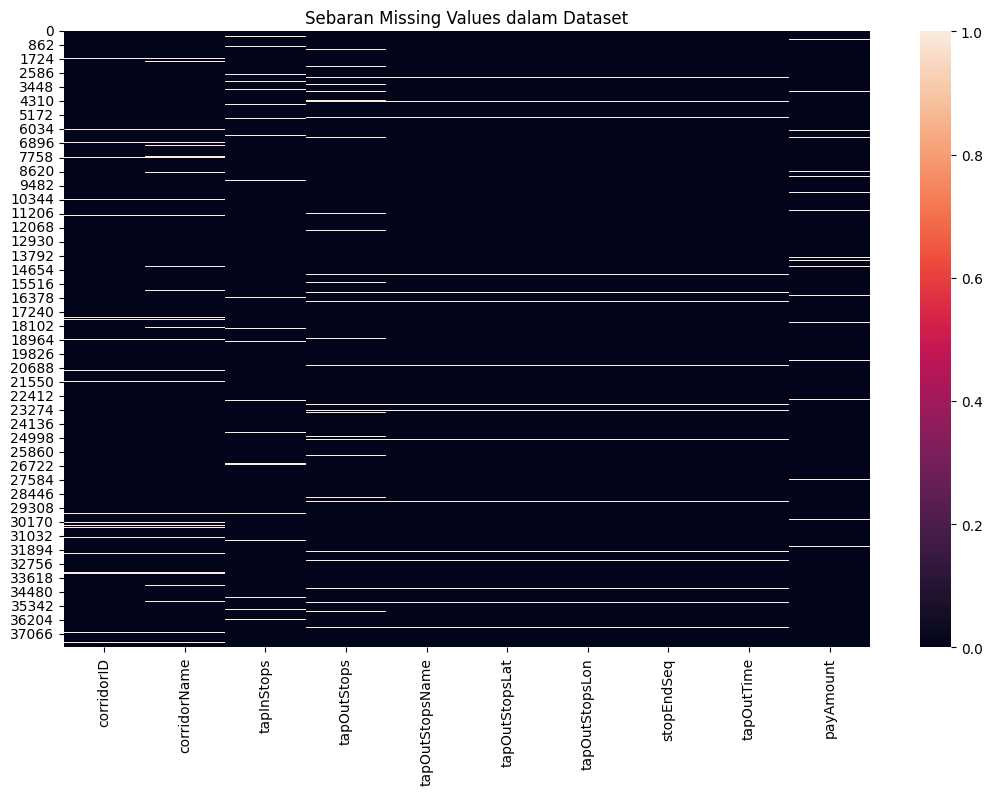

In [206]:
# Sebaran missing value di dalam dataset

plt.figure(figsize=(13, 8))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime', 'payAmount' ]].isna())
plt.title('Sebaran Missing Values dalam Dataset')
plt.show()

Berikut garis besar missing value

- missing value pada kolom corridorName dan tapOutStops memiliki proporsi 5 % dan 6 %
- missing value pada kolom corridorID dan corridorName memiliki sebaran yang terlihat berkaitan. dapat dilihat dari garisnya berhubungan.
- missing value pada kolom tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq dan tapOutTime  memiliki sebaran yang terlihat berkaitan dengan persentase nilai missing value   yang sama yakni 3.5 %
- missing value pada kolom payAmount memiliki sebaran yang tidak berkaitan dengan data yang lain.

# Handling Missing Value

Berikut beberapa cara untuk menanggulangi missing value

- corridorID dan corridorName

Berdasarkan data di atas kolom corridorID dan corridorName saling berkaitan. Maka dari itu, akan diisi kedua kolom tersebut secara bersamaan


In [207]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'

df[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

Missing value pada kolom corridorID adalah 1257 dan kolom corridorName 1930. Pertama akan dilakukan mapping agar kedua kolom tersebut bisa mengisi satu sama lain. Kedua melakukan penggantian missing value sesuai maping data yang telah didefinisikan

In [208]:
# Memastikan kolom yang kosong diwakili oleh nan
df['corridorID'].fillna(np.nan, inplace=True)

# Membuat mapping antara corridorID dan corridorName yang tidak kosong
mapping = df[df['corridorID'].notnull()].groupby('corridorName')['corridorID'].unique().apply(lambda x: x[0])

# Mengganti nilai yang hilang di corridorID berdasarkan corridorName yang sesuai
df['corridorID'].fillna(df['corridorName'].map(mapping), inplace=True)

In [209]:
df['corridorID'].isna().sum()

1125

Berdasarkan mapping corridorID dengan corridorName hanya terisi 132 data.

- Mengisi missing value pada field corridorID berdasarkan tapInStopsLat dan tapInStopLon

Berdasarkan domain knowledge data tapInStopsLat dan tapInStopLon memberikan penjelasan tentang posisi geografis (koordinat), sehingga melakukan mapping lokasi corridorID 

In [210]:
df_mapping_corridorID = df.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
df_mapping_corridorID = df_mapping_corridorID.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

def fill_corridorID(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return df_mapping_corridorID.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

df['corridorID'] = df.apply(fill_corridorID, axis=1)

In [211]:
df['corridorID'].isna().sum()

33

- Mengisi missing value pada kolom corridorName berdasarkan corridorID yang sesuai

Sama seperti proses pengisian nilai corridorID dengan referensi dari corridorName, sekarang kita akan mencoba pendekatan serupa untuk mengatasi nilai yang hilang pada field corridorName, menggunakan nilai yang terdapat dalam field corridorID

In [212]:
df['corridorName'].fillna(np.nan, inplace=True)

mapping = df[df['corridorName'].notnull()].groupby('corridorID')['corridorName'].unique().apply(lambda x: x[0])
df['corridorName'].fillna(df['corridorID'].map(mapping), inplace=True)

In [213]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,1213,3.201


Kolom corridorID dan corridorName terdapat 33 baris data dengan nilai yang hilang, yang dapat dihapus karena jumlahnya hanya 0.087 persen dari total baris data yang tersedia. Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan karena <1% dari total data.

- Mengisi missing value pada field tapInStops dengan tapInStopsName

In [214]:
df['tapInStops'].fillna(np.nan, inplace=True)

mapping = df[df['tapInStops'].notnull()].groupby('tapInStopsName')['tapInStops'].unique().apply(lambda x: x[0])
df['tapInStops'].fillna(df['tapInStopsName'].map(mapping), inplace=True)

In [215]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,34,0.090


Kolom tapInStops terdapat 34 baris data dengan nilai yang hilang, yang dapat dihapus karena jumlahnya hanya 0.090 persen dari total baris data yang tersedia. Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan karena <1% dari total data.

- Mengisi missing value pada kolom tapInStops dengan tapInStopsName

Melakukan pendekatan serupa dengan corridorID dan corridorName, setiap tapInStopsName 

In [216]:
df['tapOutStops'].fillna(np.nan, inplace=True)

mapping = df[df['tapOutStops'].notnull()].groupby('tapOutStopsName')['tapOutStops'].unique().apply(lambda x: x[0])
df['tapOutStops'].fillna(df['tapOutStopsName'].map(mapping), inplace=True)

In [217]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,34,0.090


- Mengisi kolom missing value pada kolom payAmount

Menangulangi missing value pada kolom payAmount yang kosong, dapat diisi menggunakan domain knowledge. Pertama perlu dicek terlebih dahulu corridorID mana saja yang nilai payAmountnya kosong.

In [218]:
# Koridor mana saja yang missing value
df[df['payAmount'].isna()]['corridorID'].value_counts()

corridorID
M7B        319
JAK.48A    251
M1H        174
JAK.48B    163
3H          92
9D           2
6D           2
6Q           1
B13          1
M3           1
6C           1
Name: count, dtype: int64

Berdasarkan domain knowledge, diketahui nilai payAmount untuk masing-masing koridor ID yang kosong, sebagai berikut:

- corridorID M7B, M1H, 6C, 9D, 6D, 6Q berdasarkan informasi dari Peta Rute Transjakarta merupakan Layanan Non BRT dengan tarif Rp. 3500
- corridorID 3H, M3 berdasarkan informasi dari Peta Rute Transjakarta merupakan Layanan BRT dengan tarif Rp. 3500
- corridorID JAK.48A & JAK.48B berdasarkan informasi dari Peta Rute Transjakarta dan laman kompas serta detik.com termasuk kategori Mikrotrans (Jaklingko) dengan tarif Rp. 0
- corridorID B13 Berdasarkan informasi dari Peta Rute Transjakarta bahwa untuk corridor jenis ini merupakan layanan Royaltrans dengan tarif: Rp. 20000

sumber: [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/)

In [219]:
df.loc[df['corridorID'] == 'JAK.48A', 'payAmount'] = 0
df.loc[df['corridorID'] == 'JAK.48B', 'payAmount'] = 0
df.loc[df['corridorID'] == 'M7B', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M1H', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6C', 'payAmount'] = 3500
df.loc[df['corridorID'] == '9D', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6D', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6Q', 'payAmount'] = 3500
df.loc[df['corridorID'] == '3H', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M3', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'B13', 'payAmount'] = 20000

In [220]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,34,0.090


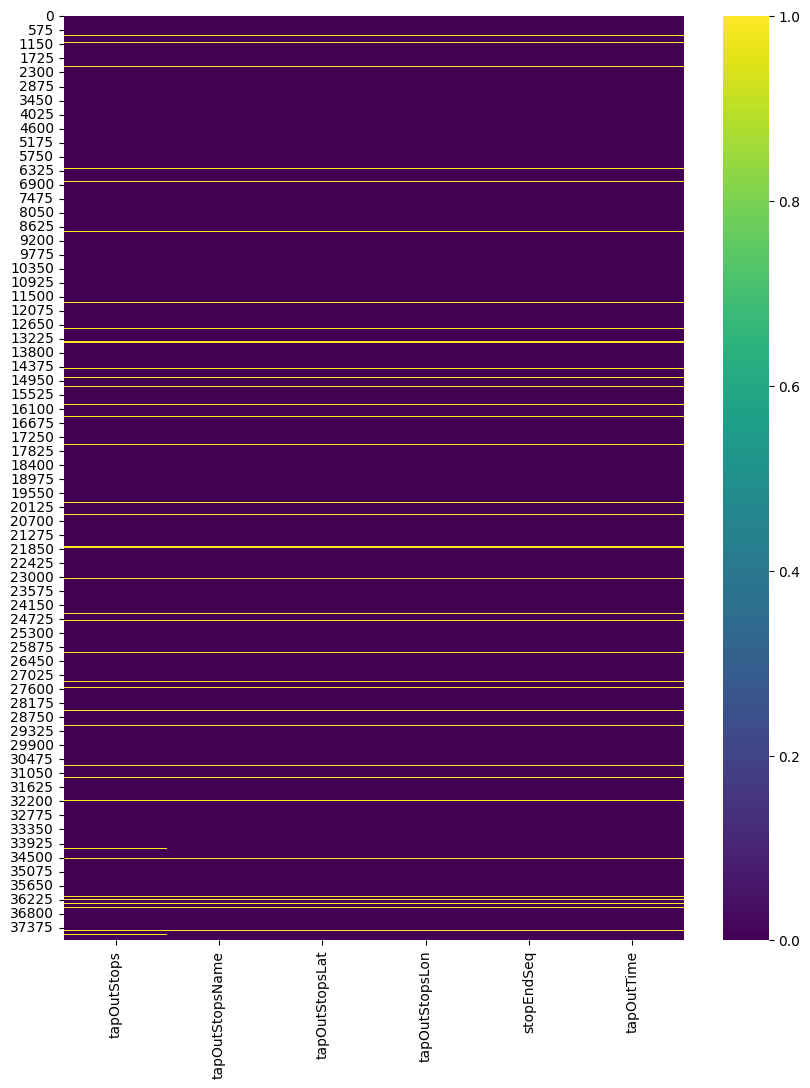

In [221]:
# Menggambarkan sebaran missing value pada kolom tapOutStops dan tapOutStopsName, tapOutStopsLat,tapOutStopsLon, stopEndSeq, dan tapOutTime
plt.figure(figsize=(10, 12))
sns.heatmap(df[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq','tapOutTime' ]].isnull(), cmap='viridis')
plt.show()

Berdasarkan heatmap sebaran missing value diatas dapat diketahui bahwa:
- Distribusi nilai yang hilang di kolom selain tapOutStops saling berkaitan.
- Menghapus data-data ini menjadi solusi, karena belum ada metode yang tepat untuk mengisi nilai-nilai tersebut.
- Menjaga data ini agar tidak kosong menjadi penting untuk  dalam distribusi data.


Setelah dilakukan handling missing value berdasarkan domain knowledge, untuk field payAmount sudah tidak ada lagi missing valuenya. Selanjutnya dapat dilakukan drop untuk sisa missing value yang masih terdapat pada field corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime mengingat belum ada metode yang tepat untuk mengisi nilai-nilai tersebut.

In [222]:
# Mendrop sisa data yang masih Missing Value

df_drop = ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
df.dropna(subset= df_drop, inplace= True)

#Delete Kolom payCardName

Kolom payCardName akan di drop karena dianggap anomali karena setelah dilihat datanya tidak ada kesinambungan dengan analisi yang dilakukan

In [223]:
# Drop kolom nama pengguna kartu karna tidak akan digunakan

df.drop('payCardName', axis=1, inplace=True)

# Transformasi data

Mengubah data ke format yang sesuai untuk dilakukan analis lebih lanjut

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36474 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           36474 non-null  object 
 1   payCardID         36474 non-null  int64  
 2   payCardBank       36474 non-null  object 
 3   payCardSex        36474 non-null  object 
 4   payCardBirthDate  36474 non-null  int64  
 5   corridorID        36474 non-null  object 
 6   corridorName      36474 non-null  object 
 7   direction         36474 non-null  float64
 8   tapInStops        36474 non-null  object 
 9   tapInStopsName    36474 non-null  object 
 10  tapInStopsLat     36474 non-null  float64
 11  tapInStopsLon     36474 non-null  float64
 12  stopStartSeq      36474 non-null  int64  
 13  tapInTime         36474 non-null  object 
 14  tapOutStops       36474 non-null  object 
 15  tapOutStopsName   36474 non-null  object 
 16  tapOutStopsLat    36474 non-null  float64
 17

In [225]:
# Mengubah format waktu pada kolom tapInTime dan tapOutTime     
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [226]:
# Menambahkan kolom jam dan hari
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

df['tapDay'] = df['tapInTime'].dt.dayofweek
df['tapDay'] = df['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})

# Menambahkan kolom untuk weekdays dan weekend
df['dayType'] = df['tapDay'].replace({'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'})

df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,dayType
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,Weekday
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,Weekday
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,Weekday
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,Weekday
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,Weekday


In [227]:
# Menambahkan kolom untuk usia pengguna

df['age'] = 2023 - df['payCardBirthDate']

df.head()


,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,dayType,age
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,Weekday,15
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,Weekday,26
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,Weekday,31
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,Weekday,45
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,Weekday,41


# Menambahkan kolom untuk ageGroup yang berisi kategori pengguna

Kategori usia di Indonesia berdasarkan produktivitas yang umum digunakan dalam studi demografis

- Anak-anak (0-14 tahun) : Usia ini biasanya tidak terlibat dalam aktivitas ekonomi atau produktif karena fokus mereka pada pertumbuhan fisik dan mental serta pendidikan dasar.
- Remaja (15-24 tahun): Usia ini sering dianggap sebagai periode transisi dari pendidikan ke kehidupan kerja.
- Dewasa (25-64 tahun) :Usia ini dianggap sebagai puncak produktivitas dalam kehidupan seseorang. Individu dalam kelompok usia ini biasanya sudah menyelesaikan pendidikan mereka dan terlibat penuh dalam aktivitas ekonomi dan pekerjaan.
- Lansia (65 tahun ke atas): Usia ini biasanya dianggap sebagai periode pensiun. Lansia dalam kelompok ini mungkin sudah tidak terlibat aktif dalam pekerjaan penuh waktu.

In [228]:
# Menambah kolom ageGroup
def categorize_age(age):
    if age < 15:
        return 'Anak- Anak'
    elif 15 <= age <= 24:
        return 'Remaja'
    elif 25 <= age <= 64:
        return 'Dewasa'
    else:
        return 'Lansia'

# Menerapkan fungsi untuk membuat kolom 'ageGroup'
df['Kategori Umur'] = df['age'].apply(categorize_age)

df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,dayType,age,Kategori Umur
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,Weekday,15,Remaja
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,Weekday,26,Dewasa
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,Weekday,31,Dewasa
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,Weekday,45,Dewasa
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,Weekday,41,Dewasa


# Sebaran data (Outlier)

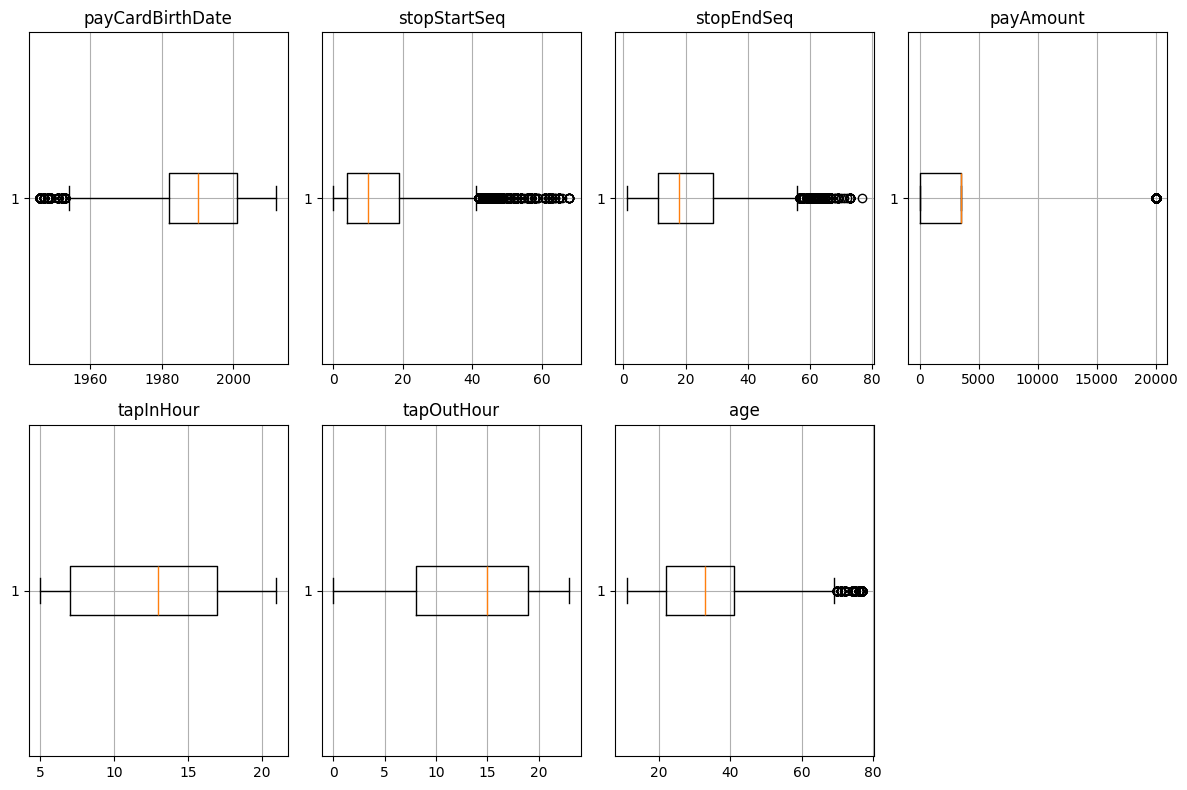

In [229]:
# Melihat sebaran data atau outliers
columnscheck = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount', 'tapInHour', 'tapOutHour', 'age']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columnscheck):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'{column}')
    plt.grid()

plt.tight_layout()
plt.show()

Lalu melakukan uji normalitas dengan menggunakan Kolmogorov-Smirnov Test untuk menguji lebih detail apakah data terdistribusi normal atau tidak.

In [230]:
# Uji Normalitas dengan menggunakan Kolmogorov-Smirnov Test

uji_data = ['payCardBirthDate','stopStartSeq','stopEndSeq','payAmount','tapInHour','tapOutHour','age']

list = []

for i in uji_data : 
    ks,pvalue = kstest((df[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')

print('\nHasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal

Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,payCardBirthDate,0.0,berdistribusi tidak normal
1,stopStartSeq,0.0,berdistribusi tidak normal
2,stopEndSeq,0.0,berdistribusi tidak normal
3,payAmount,0.0,berdistribusi tidak normal
4,tapInHour,0.0,berdistribusi tidak normal
5,tapOutHour,0.0,berdistribusi tidak normal
6,age,0.0,berdistribusi tidak normal


Kolom yang dilihat yaitu kolom-kolom yang berisikan nilai numerikal. Berdasarkan temuan diatas yang berupa boxplot dan uji normalitas Kolmogorov-Smirnov Test, disimpulkan bahwa data tidak terdistribusi normal.

In [231]:
# Export data clean ke excel
# df.to_excel('Transjakarta.xlsx', index=False)

# Data Analysis and Visualisation

# Pola Karakteristik Pengguna Transjakarta Berdasarkan Gender dan Usia

In [232]:
# Membuat variabel gender
gender = df['payCardSex'].value_counts()
gender

payCardSex
F    19429
M    17045
Name: count, dtype: int64

In [233]:
# menghitung persentase dari distribusi jenis kelamin
gender_per = (df['payCardSex'].value_counts(normalize=True) * 100).round(2)
gender_per

payCardSex
F    53.27
M    46.73
Name: proportion, dtype: float64

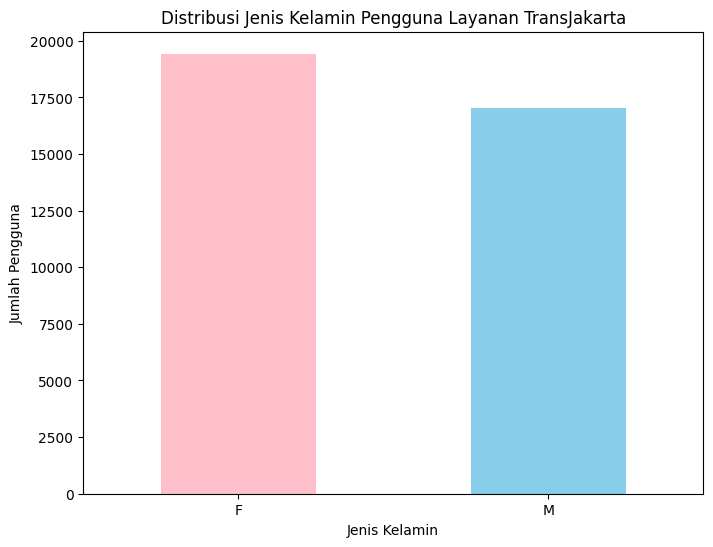

In [234]:
# Membuat chart Berdasarkan jenis kelamin pengguna Layanan 
plt.figure(figsize=(8, 6))
gender.plot(kind='bar', color=['pink', 'skyblue'])
plt.title('Distribusi Jenis Kelamin Pengguna Layanan TransJakarta')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)
plt.show()



Grafik di atas menampilkan distribusi jumlah pengguna layanan Transjakarta berdasarkan jenis kelamin. Berikut poin dari grafik di atas:
- Terdapat sekitar 19429 pengguna wanita yang menggunakan layanan Transjakarta.
- Terdapat sekitar 17045 pengguna pria yang menggunakan layanan Transjakarta.

Pengguna wanita sedikit lebih banyak dibandingkan dengan pengguna pria. Ini terlihat dari perbedaan tinggi batang antara wanita dan pria, di mana batang wanita (pink) lebih tinggi dibandingkan batang pria (biru).

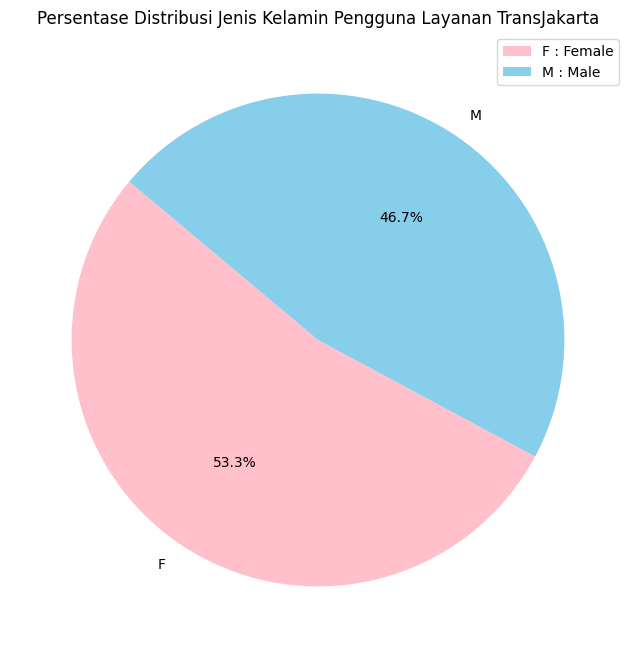

In [235]:
# Persentase Jenis Kelamin Pengguna Layanan Transjakarta

plt.figure(figsize=(8, 8))
pie = plt.pie(gender_per, labels=gender_per.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Persentase Distribusi Jenis Kelamin Pengguna Layanan TransJakarta')
plt.legend(pie[0], labels=['F : Female', 'M : Male'], loc='upper right')
plt.ylabel('')  # Menghapus label sumbu y
plt.show()

Berikut deskriptif dari pie chart di atas:
- Pengguna wanita mencakup sekitar 53.3% dari total pengguna Transjakarta. 
- Pengguna pria mencakup sekitar 46.7% dari total pengguna Transjakarta.

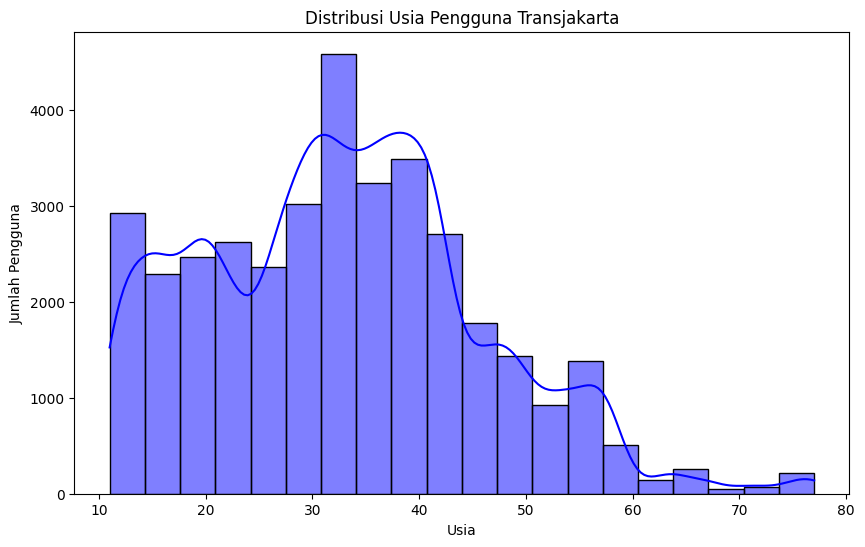

In [236]:
# distribusi usia penengguna
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribusi Usia Pengguna Transjakarta')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()

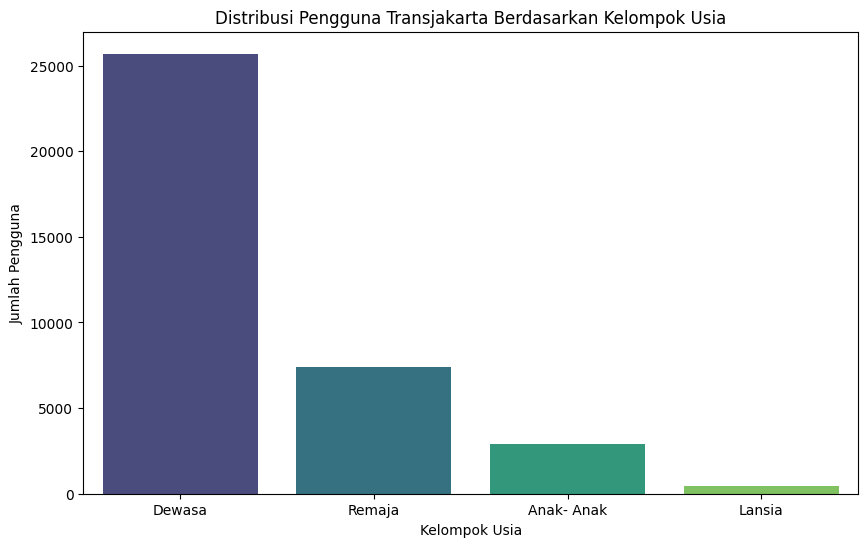

In [239]:
# Distribusi pengguna berdasarkan kelompok usia menggunakan barplot

age_group_distribution = df['Kategori Umur'].value_counts().reset_index()
age_group_distribution.columns = ['Kategori Umur', 'User Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori Umur', y='User Count', data=age_group_distribution, palette='viridis')
plt.title('Distribusi Pengguna Transjakarta Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()


Distribusi pengguna berdasarkan kelompok usia:

- Kelompok Usia Dewasa: Mayoritas pengguna Transjakarta berada dalam kelompok usia 25-54 tahun. Ini menunjukkan bahwa layanan Transjakarta banyak digunakan oleh usia produktif yang kemungkinan besar adalah pekerja.
- Kelompok Usia Remaja: Jumlah pengguna usia 15-24 yang cukup signifikan berasal dari kelompok usia ini, yang mungkin terdiri dari pelajar dan mahasiswa.
- Kelompok Usia Lainnya: Pengguna dari kelompok usia lainnya (0-14 dan lanjut usia) lebih sedikit, menunjukkan bahwa layanan ini kurang digunakan oleh kelompok usia muda dan lanjut usia.

# Pola Karakteristik Pengguna Transjakarta Berdasarkan Hari Kerja dan Akhir Pekan

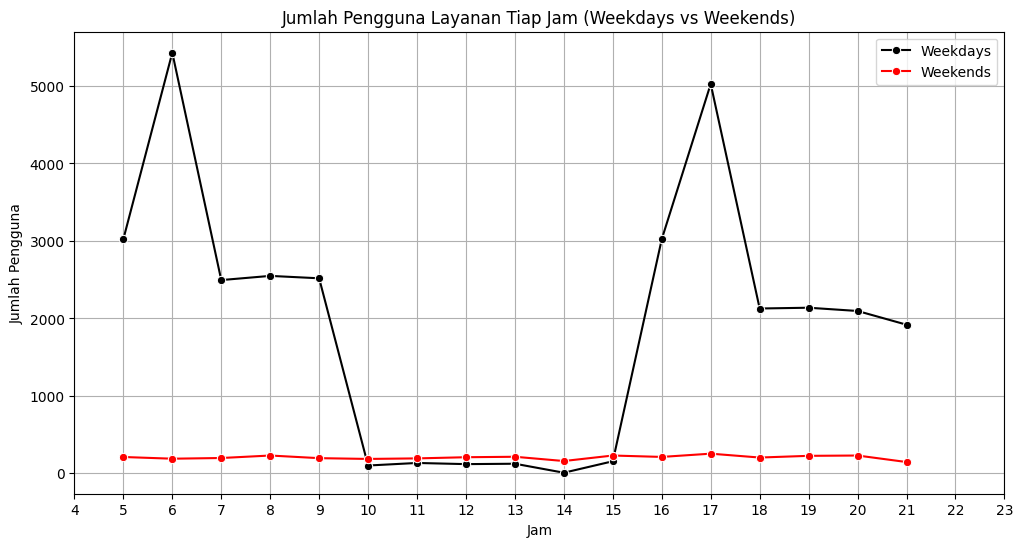

In [ ]:
# Pengguna Tranjakarta pada hari kerja dan hari akhir pekan
plt.figure(figsize=(12, 6))

# Plot untuk weekdays
weekdays_data = df[df['dayType'] == 'Weekday']
weekdays_hours = weekdays_data.groupby('tapInHour').size().reset_index(name='user_count')
sns.lineplot(x=weekdays_hours['tapInHour'], y=weekdays_hours['user_count'], marker='o', color='black', label='Weekdays')

# Plot untuk weekends
weekends_data = df[df['dayType'] == 'Weekend']
weekends_hours = weekends_data.groupby('tapInHour').size().reset_index(name='user_count')
sns.lineplot(x=weekends_hours['tapInHour'], y=weekends_hours['user_count'], marker='o', color='red', label='Weekends')

# Formatting the plot
plt.title('Jumlah Pengguna Layanan Tiap Jam (Weekdays vs Weekends)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks(range(4, 24))
plt.legend()
plt.grid(True)
plt.show()

Grafik di atas menunjukkan jam-jam sibuk pada hari kerja (weekdays) dan akhir pekan (weekends) dalam bentuk lineplot:
- Pada hari kerja, terdapat lonjakan penumpang terjadi direntang jam 5-9 dan 16-21. Ini menunjukan waktu sibuk pengguna transjakarta berangkat dan pulang beraktivitas.
- Pada akhir pekan, tidak ada lonjakan jumlah pengguna layanan transjakarta dan cendrung stabil pada jam operasional

# Pola Karakteristik Pengguna Transjakarta Berdasarkan Koridor dan Halte

In [ ]:
# Menghitung jumlah pengguna dalam setiap koridor
koridor_counts = df['corridorName'].value_counts()

# 5 koridor tertinggi dan 5 koridor terendah
kor_top5 = koridor_counts.head(5)
kor_bot5 = koridor_counts.tail(5)

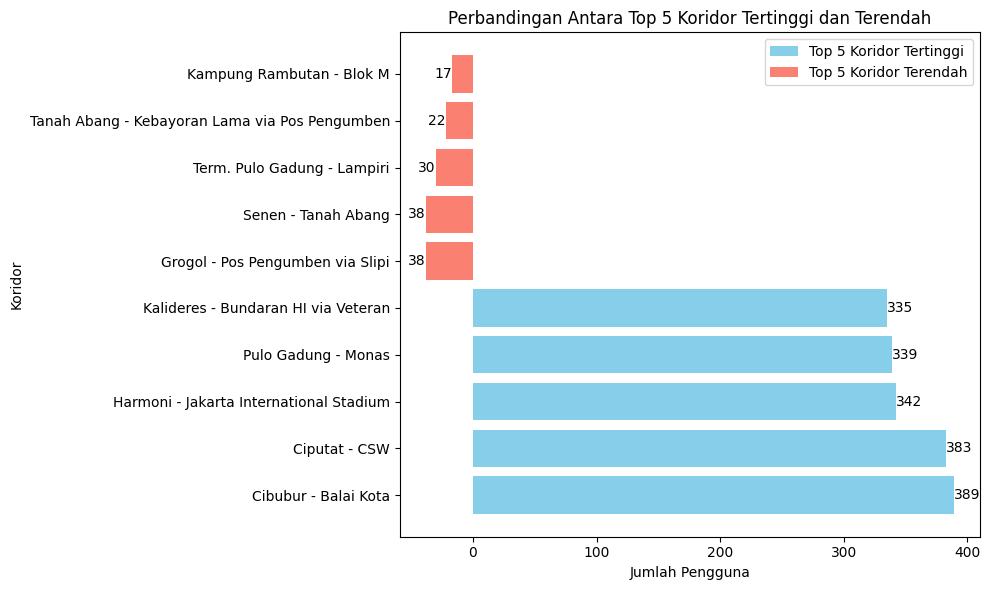

In [ ]:
# Membuat subplot
plt.figure(figsize=(10, 6))

# Plot top 5 pengguna koridor tertinggi
bars_top = plt.barh(kor_top5.index, kor_top5.values,color='Skyblue', label='Top 5 Koridor Tertinggi')

# Plot top 5 pengguna koridor terendah dengan nilai negatif
bars_bottom = plt.barh(kor_bot5.index, -kor_bot5.values, color='salmon', label='Top 5 Koridor Terendah')

# Menambahkan nilai anotasi di dalam barchart
for bar in bars_top:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black')

for bar in bars_bottom:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(-bar.get_width())}', 
             va='center', ha='right', color='black')

# Menambahkan judul dan label
plt.title('Perbandingan Antara Top 5 Koridor Tertinggi dan Terendah')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Koridor')

# Menampilkan plot
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan barplot diatas, menjelaskan bahwa:
- Pola pengguna terbanyak berada di koridor Cibubur - BalaiKota  dengan 389 pengguna, Ciputat - CSW dengan 383 pengguna, Harmoni - Jakarta International Stadium dengan 342 pengguna, Pulo Gadung - Monas dengan 339 pengguna, dan Kalideres - Bundaran HI via Veteran 335 pengguna. 5 koridor ini engindikasikan bahwa rute ini melayani kebutuhan transportasi yang signifikan di kawasan tersebut.

- Pola pengguna terendah berada pada koridor Kampung Rambutan - Blok M dengan 17 pengguna, Tanah Abang - Kebayoran Lama via Pos Pengumben 22 pengguna, Term. Pulo Gadung - Lampiri 30 pengguna, Senen - Tanah Abang 38 pengguna, dan Grogol - Pos Pengumben via Slipi 38 pengguna. 5 koridor memiliki pengguna yang sangat sedikit, menunjukkan kurangnya permintaan.

In [ ]:
# Menghitung jumlah pengguna dalam setiap Halte

# Halte Tersibuk Berdasarkan Tap In:
busiest_tap_in_stops = df['tapInStopsName'].value_counts().reset_index().head(5)
busiest_tap_in_stops.columns = ['Stop Name', 'Tap In Count']

# Halte Tersepi Berdasarkan Tap In:
least_busy_tap_in_stops = df['tapInStopsName'].value_counts().reset_index().tail(5)
least_busy_tap_in_stops.columns = ['Stop Name', 'Tap In Count']

# Halte Tersibuk Berdasarkan Tap Out:
busiest_tap_out_stops = df['tapOutStopsName'].value_counts().reset_index().head(5)
busiest_tap_out_stops.columns = ['Stop Name', 'Tap Out Count']

# Halte Tersepi Berdasarkan Tap Out:
least_busy_tap_out_stops = df['tapOutStopsName'].value_counts().reset_index().tail(5)
least_busy_tap_out_stops.columns = ['Stop Name', 'Tap Out Count']

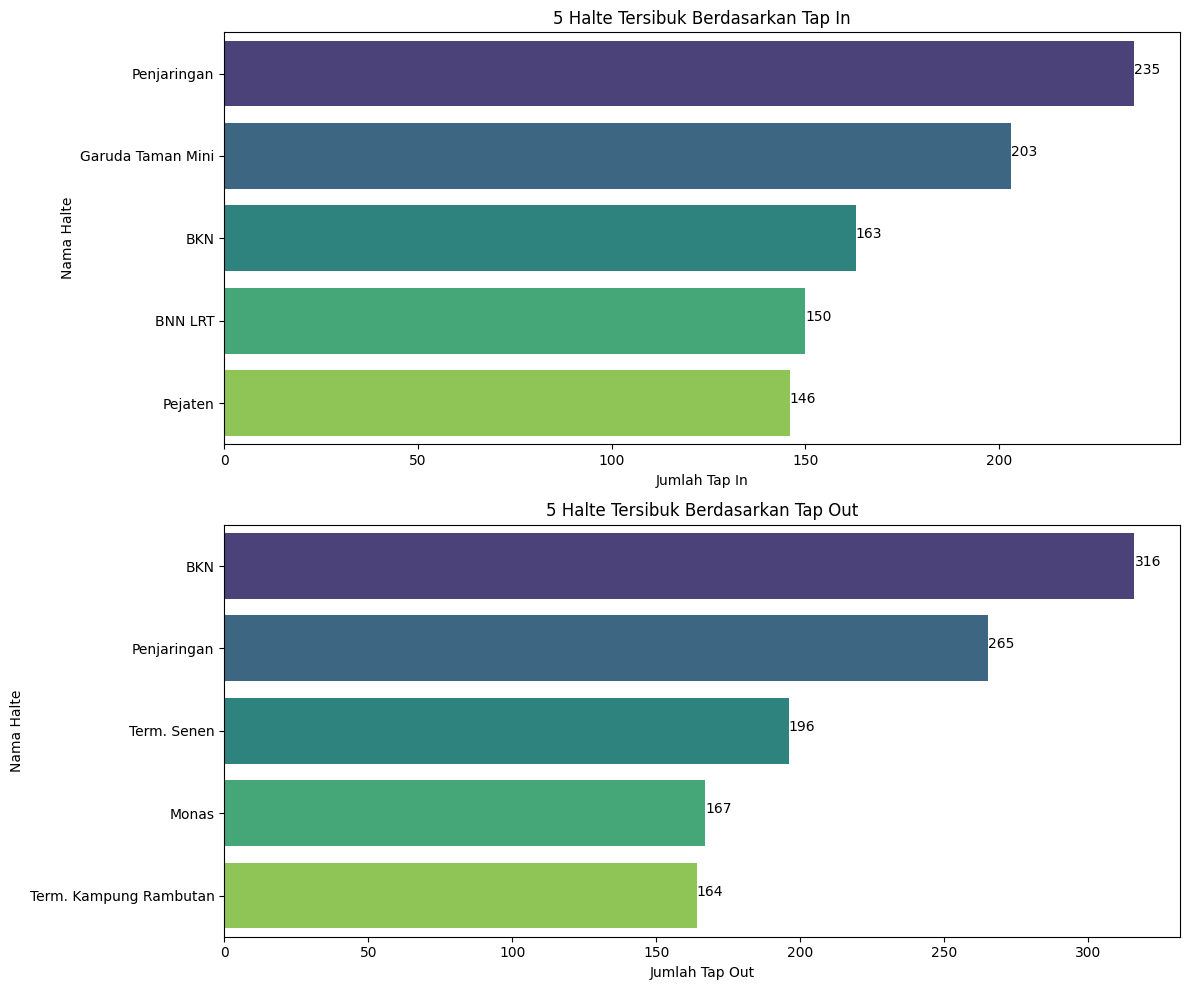

In [ ]:
# Visualisasi halte tersibuk dan tersepi berdasarkan tap in

plt.figure(figsize=(12, 10))

# Halte Tersibuk Berdasarkan Tap In
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='Tap In Count', y='Stop Name', data=busiest_tap_in_stops, palette='viridis')
plt.title('5 Halte Tersibuk Berdasarkan Tap In')
plt.xlabel('Jumlah Tap In')
plt.ylabel('Nama Halte')

# Menampilkan angka jumlah pada bar
for index, value in enumerate(busiest_tap_in_stops['Tap In Count']):
    ax1.text(value, index, str(value))

# Halte Tersibuk Berdasarkan Tap Out
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='Tap Out Count', y='Stop Name', data=busiest_tap_out_stops, palette='viridis')
plt.title('5 Halte Tersibuk Berdasarkan Tap Out')
plt.xlabel('Jumlah Tap Out')
plt.ylabel('Nama Halte')

# Menampilkan angka jumlah pada bar
for index, value in enumerate(busiest_tap_out_stops['Tap Out Count']):
    ax2.text(value, index, str(value))

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi halte tersibuk berdasarkan tap in dan tap out. Halte-halte ini menunjukkan volume pengguna yang tinggi baik untuk memulai maupun mengakhiri perjalanan.
Penjaringan dan BKN adalah dua halte yang paling sibuk baik dari sisi tap in maupun tap out. Ini menunjukkan bahwa kedua halte ini merupakan titik utama dalam rute perjalanan Transjakarta.

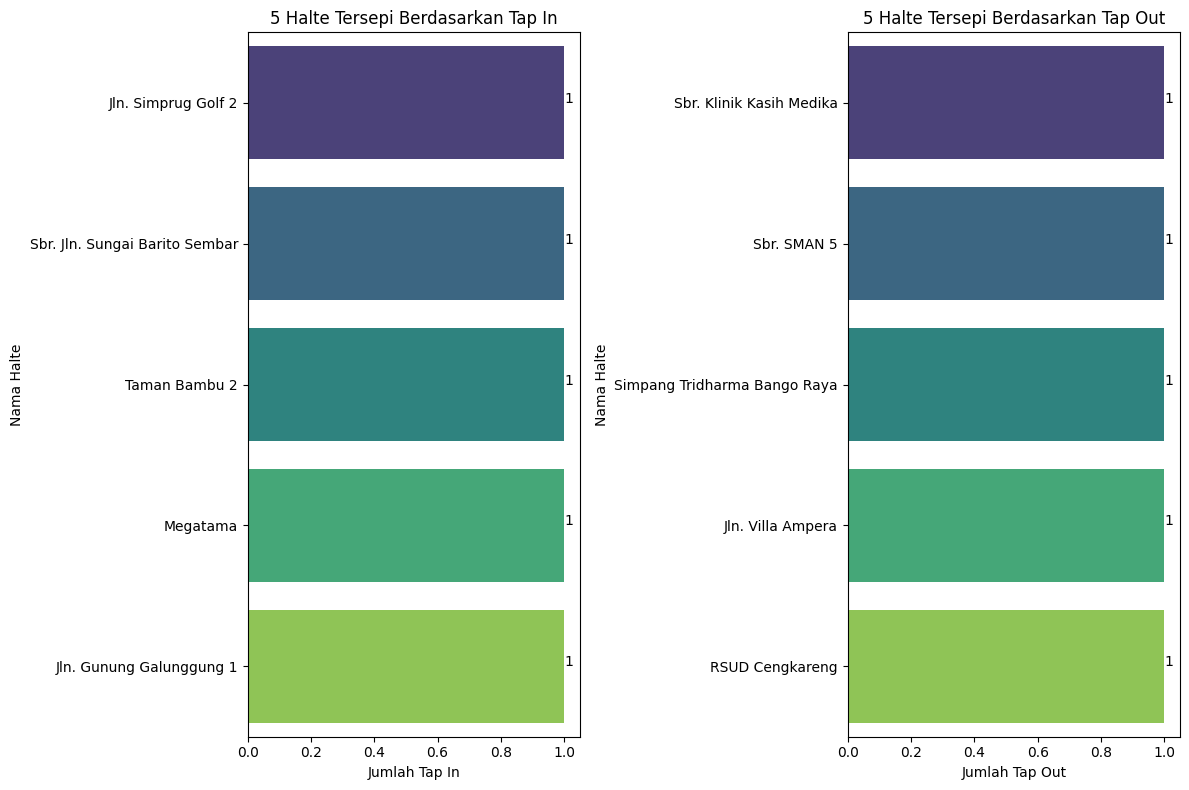

In [ ]:
# Visualisasi halte tersepi berdasarkan tap in dan tap out
plt.figure(figsize=(12, 8))

# Halte Tersepi Berdasarkan Tap In
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Tap In Count', y='Stop Name', data=least_busy_tap_in_stops, palette='viridis')
plt.title('5 Halte Tersepi Berdasarkan Tap In')
plt.xlabel('Jumlah Tap In')
plt.ylabel('Nama Halte')

# Menampilkan angka jumlah pada bar
for index, value in enumerate(least_busy_tap_in_stops['Tap In Count']):
    ax1.text(value, index, str(value), color='black', ha="left")

# Halte Tersepi Berdasarkan Tap Out
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Tap Out Count', y='Stop Name', data=least_busy_tap_out_stops, palette='viridis')
plt.title('5 Halte Tersepi Berdasarkan Tap Out')
plt.xlabel('Jumlah Tap Out')
plt.ylabel('Nama Halte')

# Menampilkan angka jumlah pada bar
for index, value in enumerate(least_busy_tap_out_stops['Tap Out Count']):
    ax2.text(value, index, str(value), color='black', ha="left")

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi halte tersepi berdasarkan tap in dan tap out. Halte-halte ini menunjukkan volume pengguna yang sangat rendah baik untuk memulai maupun mengakhiri perjalanan.
Semua halte dalam kategori ini hanya memiliki 1 pengguna yang melakukan tap in atau tap out, menunjukkan volume pengguna yang sangat rendah.

# Pola Karakteristik Layanan Transjakarta berdasarkan Tarif dan Pendapatan paycard 

Text(0, 0.5, 'Frekuensi')

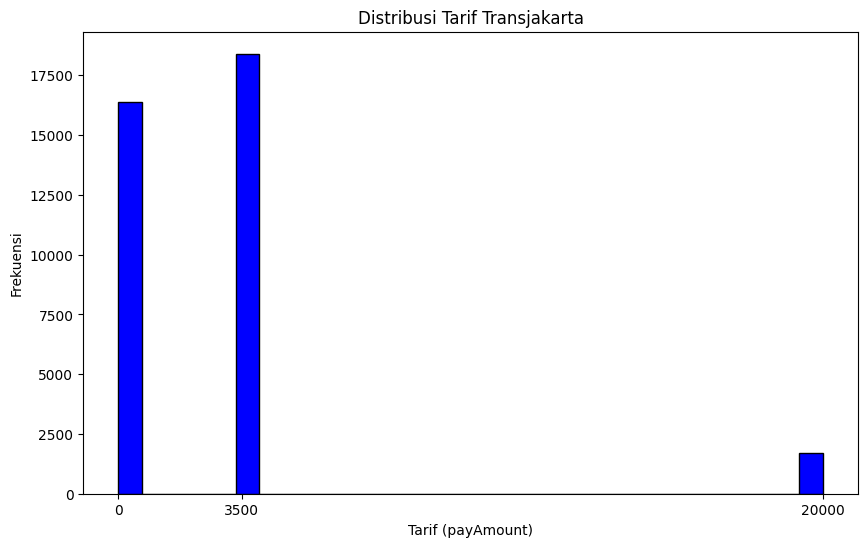

In [ ]:
# Distribusi Tarif Moda Transjakarta

plt.figure(figsize=(10, 6))
plt.hist(df['payAmount'], bins=30, color='blue', edgecolor='black')
plt.xticks([0, 3500, 20000])
plt.title('Distribusi Tarif Transjakarta')
plt.xlabel('Tarif (payAmount)')
plt.ylabel('Frekuensi')

Distribusi Tarif:

- Mayoritas tarif yang dibayarkan berkisar di sekitar tarif standar Transjakarta, yaitu Rp3,500.
- Ada beberapa pembayaran dengan nilai yang jauh lebih tinggi, yang mungkin menunjukkan pembayaran untuk beberapa perjalanan atau jenis layanan khusus.

In [ ]:
# Jumlah pengguna kartu pembayaran

jumlah_pengguna = df['payCardBank'].value_counts().index
jumlah_pengguna

Index(['dki', 'emoney', 'brizzi', 'flazz', 'online', 'bni'], dtype='object', name='payCardBank')

In [ ]:
cust_bank = df.payCardBank.value_counts().reset_index(name='count')
cust_bank

,payCardBank,count
0,dki,18015
1,emoney,6625
2,brizzi,3390
3,flazz,3101
4,online,2765
5,bni,2578


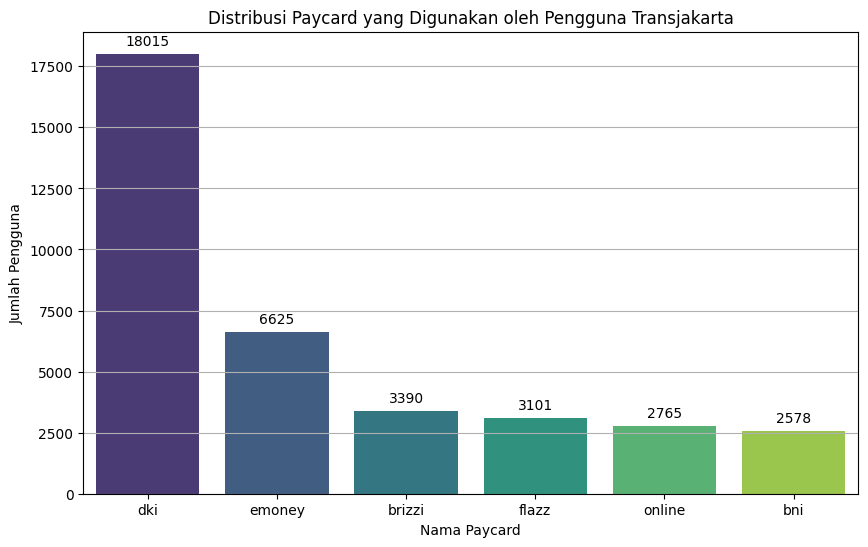

In [ ]:
plt.figure(figsize=(10, 6))
plots2 = sns.countplot(data=df, x='payCardBank', order=df['payCardBank'].value_counts().index, palette='viridis')
plt.grid(axis='y')

# Menambahkan anotasi ke setiap bar
for p in plots2.patches:
    plots2.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),  # Jarak teks dari bar
                    textcoords = 'offset points')

plt.title('Distribusi Paycard yang Digunakan oleh Pengguna Transjakarta')
plt.xlabel('Nama Paycard')
plt.ylabel('Jumlah Pengguna')
plt.show()

Berdasarkan Paycard terdapat 6 jenis pola pembayaran pengguna transjakarta dengan distribusi sebagai berikut :

- Pembayaran mengguanakan Bank DKi : 17505
- Pembayaran mengguanakan emoney : 6439 
- Pembayaran mengguanakan brizzi : 3285 
- Pembayaran mengguanakan flazz : 3013
- Pembayaran mengguanakan online : 2503 
- Pembayaran menggunakan bank BNI : 2503 

Terdapat perbedaan signifikan distribusi penggunaan antara bank DKi dengan kartu lainnya, dikarenakan ada program layanan gratis dari pemerintah DKI Jakarta. 

sumber: [layanan gratis transjakarta](https://transjakarta.co.id/informasi-pendaftaran-kartu-layanan-gratis-transjakarta-tj-card-terkini-2022/)

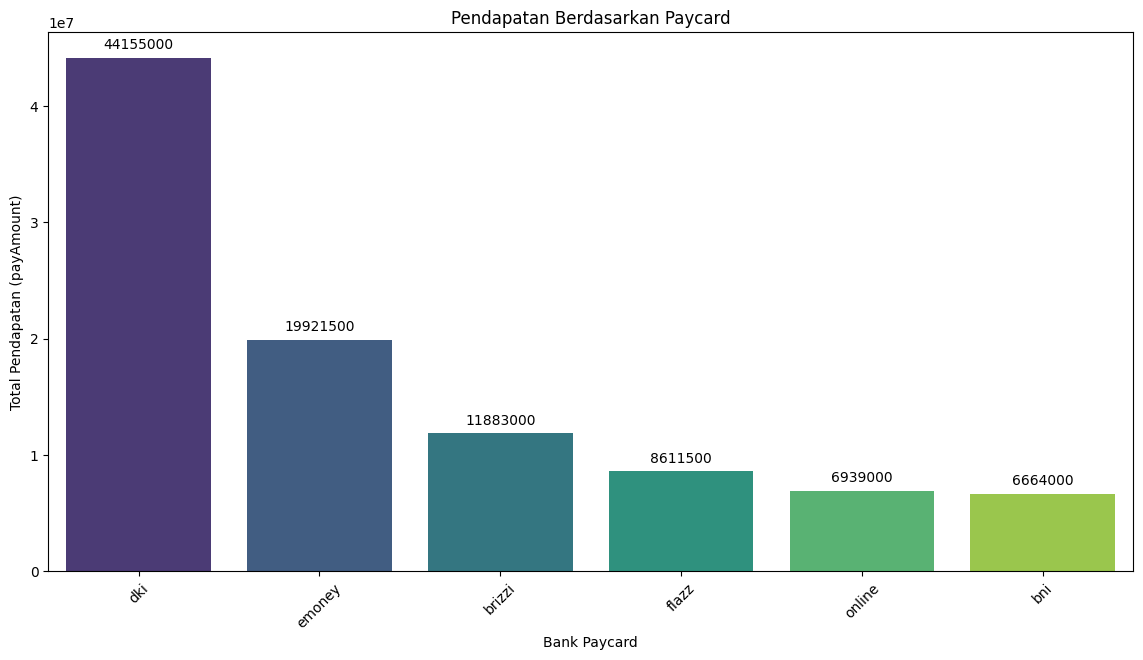

In [ ]:
# Menghitung nilai total pendapatan dan mengurutkan berdasarkan paycard
pendapatan_by_paycard = df.groupby('payCardBank')['payAmount'].sum().reset_index()
pendapatan_by_paycard = pendapatan_by_paycard.sort_values(by='payAmount', ascending=False)

# Visualisasi pendapatan berdasarkan paycard
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='payCardBank', y='payAmount', data=pendapatan_by_paycard, palette='viridis')
plt.title('Pendapatan Berdasarkan Paycard')
plt.xlabel('Bank Paycard')
plt.ylabel('Total Pendapatan (payAmount)')

# Menampilkan jumlah pendapatan pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

- Berdasarkan pendapatan dari paycard , pay bank DKI menjadi pembayaran dengan pendapatan paling tinggi yaitu Rp44,115,000
- Berdasarkan pendapatan dari paycard , pay bank BNI menjadi pembayaran dengan pendapatan paling tinggi yaitu Rp6,664,000

# Simpulan dan Rekomendasi

# Simpulan
1. Pengguna layanan Tranjakarta berdasarkan demografi (gender dan usia)
    a. Gender
        Berdasarkan gender pola pengguna layanan Transjakarta, jumlah wanita sebesar 19429 pengguna dan pria sebesar 17045 pengguna dengan persentase pengguna wanita mencakup 53.7% dan pengguna pria mencakup sekitar 46.3% dari total pengguna layanan Transjakarta. Pengguna layanan Transjakarta didominasi oleh pengguna wanita.
    b. Kelompok Usia
        - Kelompok Usia 25-54: Mayoritas pengguna Transjakarta berada dalam kelompok usia 25-54 tahun. Ini menunjukkan bahwa layanan    Transjakarta banyak digunakan oleh usia produktif yang kemungkinan besar adalah pekerja.
        - Kelompok Usia 15-24: Jumlah pengguna yang cukup signifikan berasal dari kelompok usia ini, yang mungkin terdiri dari pelajar  dan mahasiswa.
        - Kelompok Usia Lainnya: Pengguna dari kelompok usia lainnya (0-14, 55-64, dan lanjut usia) lebih sedikit, menunjukkan bahwa    layanan ini kurang digunakan oleh kelompok usia muda dan lanjut usia.
        
2. Pengguna layanan Transjakarta pada hari kerja dan hari akhir pekan
    a. Hari kerja, terdapat lonjakan penumpang terjadi direntang jam 5-9 dan 15-21. Ini menunjukan waktu sibuk pengguna transjakarta berangkat dan pulang beraktivitas.
    b. Akhir pekan, tidak ada lonjakan jumlah pengguna layanan transjakarta dan cendrung stabil pada jam operasional

3. Pengguna Tranjakarta berdasarkan koridor dan halte
    a. Koridor 
        - Pola pengguna terbanyak berada di koridor Cibubur - BalaiKota  dengan 389 pengguna, Ciputat - CSW dengan 383 pengguna, Harmoni - Jakarta International Stadium dengan 342 pengguna, Pulo Gadung - Monas dengan 339 pengguna, dan Kalideres - Bundaran HI via Veteran 335 pengguna. 5 koridor ini mengindikasikan bahwa rute ini melayani kebutuhan transportasi yang signifikan di kawasan tersebut.

        - Pola pengguna terendah berada pada koridor Kampung Rambutan - Blok M dengan 17 pengguna, Tanah Abang - Kebayoran Lama via Pos Pengumben 22 pengguna, Term. Pulo Gadung - Lampiri 30 pengguna, Senen - Tanah Abang 38 pengguna, dan Grogol - Pos Pengumben via Slipi 38 pengguna. 5 koridor memiliki pengguna yang sangat sedikit, menunjukkan kurangnya permintaan.

    b. Halte
        - 5 Halte Tersibuk Berdasarkan Tap In: Penjaringan : 235 pengguna, Garuda Taman Mini: 203 pengguna, BKN: 163 pengguna, BNN LRT: 150 pengguna, Pejaten: 146 pengguna
        - 5 Halte Tersibuk Berdasarkan Tap Out: BKN: 316 pengguna, Penjaringan: 265 pengguna, Term. Senen: 196 pengguna, Monas: 167 pengguna, Term. Kampung Rambutan: 164 pengguna
        - 5 halte tersepi berdasarkan Tap In dan Tap Out: Jln. Simprug Golf 2, Sbr. Jln. Sungai Barito Sembar, Taman Bambu 2, Megatama, Jln. Gunung Galunggung 1, Sbr. Klinik Kasih Medika, Sbr. SMAN 5, Simpang Tridharma Bango Raya, Jln. Villa Ampera, RSUD Cengkareng, halte- halte tersebut adalah tersepi pengguna kemungkinan kurang stategis dalam penempatan halte dan perlu pengamatan lebih lanjut.
    

4. Pembayaran layanan berdasarkan PayCard dan pendapatan dari PayCard
    a. Tarif
        Mayoritas tarif yang dibayarkan berkisar di sekitar tarif standar Transjakarta, yaitu Rp3,500.

    b. Pengguna kartu pembayaran
        - Pembayaran mengguanakan Bank DKi : 17505
        - Pembayaran mengguanakan emoney : 6439 
        - Pembayaran mengguanakan brizzi : 3285 
        - Pembayaran mengguanakan flazz : 3013
        - Pembayaran mengguanakan online : 2503 
        - Pembayaran menggunakan bank BNI : 2503 

        Terdapat perbedaan signifikan distribusi penggunaan antara bank DKi dengan kartu lainnya.

    c. Pendapatan layanan Tranjakarta
        - Bank DKi  : Rp44,155,000
        - emoney    : Rp19,921,500
        - brizzi    : Rp11,883,000
        - flazz     : Rp8,611,500
        - online    : Rp6,939,000
        - BNI       : Rp6,664,000

        Bank DKI mendominasi dalam hal total pendapatan disusul oleh eMoney dan Brizzi juga menunjukkan pendapatan yang signifikan.
        
# Rekomendasi
1. Rekomendasi mengoptimalkan pengelolaan armada dan jadwal operasional Transjakarta untuk memastikan ketersediaan bus yang memadai pada jam-jam sibuk dan meningkatkan kepuasan pengguna
    a. Optimalisasi Operasional
        - Ketersediaan jumlah armada pada koridor tersibuk dengan jumlah penumpang pada waktu tersibuk weekdays pada jam 5-9 pagi dan jam 16-21 malam.
        - Mengarahkan armada pada koridor padat pengguna seperti Cibubur-Balai Kota, Ciputat - CSW, Harmoni - Jakarta International Stadium, Pulo Gadung - Monas, Kalideres - Bundaran HI dari koridor yang sepi seperti kampung rambutan - Bllok M, Tanah Abang - Kebayoran Lama, term Pulo Gadung - Lampiri.

    b. Penyesuaian jam Operasional
        Mempertimbangkan penyesuaian jam operasional armada pada jam sibuk untuk menjaga kualitas pelayanan dan memecah penumpukan penumpang pada halte, salah satunya dengan cara membuka gate transjkarta lebih awal di pagi hari yaitu pada jam setengah 5 terutama pada koridor : Cibubur - Balai Kota, Ciputat - CSW. dan pada halte : Rusun Kapuk Muara- Penjaringan, Penjaringan-Rusun Kapuk Muara, Garuda Taman Mini- BKN , Cibubur Junction - BKN, Garuda Taman Mini-Pinang Ranti.

    c. Informasi Jadwal
        Memastikan informasi rute dan jadwal tersedia dan mudah diakses oleh pengguna melalui aplikasi dan layar informasi di halte secara real-time.
    
2. Rekomendasi meningkatkan pendapatan dapat diterapkan pada halte-halte teramai untuk mendukung operasional dan pengembangan Transjakarta
    a. Optimalisasi Pendapatan
        Mengkaji kembali peraturan mengenai tarif Tranjakarta ([Tarif Transjakarta](https://transjakarta.co.id/faq-transjakarta/)), sebab tidak adanya kenaikan tarif sejak 2007 ([wacana kenaikan tarif Transkjakarta](https://megapolitan.kompas.com/read/2024/04/18/12005371/).
        
    b. Space Iklan
        Pasang iklan di halte-halte tersibuk seperti Penjaringan, BKN, dan Garuda Taman Mini untuk memaksimalkan visibilitas iklan. Gunakan space iklan yang menarik dan interaktif seperti digital signage atau layar LED untuk menarik perhatian pengguna. Manfaatkan data demografis pengguna untuk menyesuaikan konten iklan sesuai dengan profil penumpang yang sering menggunakan halte tersebut.

    c. Vending Machine:
        - Penempatan Strategis: Tempatkan vending machine di halte-halte dengan jumlah tap in dan tap out yang tinggi seperti BKN, Penjaringan, dan Terminal Senen.
        - Produk yang Ditawarkan: Sediakan produk yang sering dibutuhkan oleh penumpang seperti minuman, makanan ringan, masker, dan hand sanitizer.
        - Pemeliharaan Rutin: Pastikan vending machine selalu dalam kondisi baik dan produk yang dijual selalu tersedia melalui pemeliharaan rutin.

In [ ]:
#save data Cleaning

#df.to_excel("DataCleaning TJ.xlsx")